Sentiment Analysis Portion for the top 50 anime reviews/ 100 reviews per anime

In [19]:
#import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
reviews = pd.read_csv('/content/drive/MyDrive/4120project/anime_reviews.csv')
print(reviews.head(10))
print(f'Shape:{reviews.shape}')
print(reviews.info())

                title  rank  score             tags  \
0  Shingeki_no_Kyojin     1   8.54      Recommended   
1  Shingeki_no_Kyojin     1   8.54      Recommended   
2  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
3  Shingeki_no_Kyojin     1   8.54      Recommended   
4  Shingeki_no_Kyojin     1   8.54      Recommended   
5  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
6  Shingeki_no_Kyojin     1   8.54      Recommended   
7  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
8  Shingeki_no_Kyojin     1   8.54  Not Recommended   
9  Shingeki_no_Kyojin     1   8.54      Recommended   

                                              review  
0  Oh dear Shingeki no Kyojin, where do I even be...  
1  Attack on Titan Review:\n\r\nI was well aware ...  
2  Why Shingeki no Kyojin might not be the epic y...  
3  (This is my first review, so bear with me.) \n...  
4  Well, I bought into the hype. This show lives ...  
5  "Shingeki no Kyojin" or "Attack on Titan" (AOT...  
6  This i

In [21]:
x = ['title','rank','score','review','tags']
df = reviews[x]

In [22]:
df.rename(columns={"tags":"sentiment"},inplace=True)

In [23]:
def categorize_tags(tag):
    if 'Not Recommended' in tag:
        return 'Not Recommended'
    elif 'Recommended' in tag:
        return 'Recommended'
    elif 'Mixed Feelings' in tag:
        return 'Mixed Feelings'
    else:
        return None  # If none of the conditions are met

# Apply the categorization function to create a new column 'category'
df['category'] = df['sentiment'].apply(categorize_tags)

In [24]:
df.drop(columns={'sentiment'},inplace=True)
df.head(5)

,title,rank,score,review,category
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Mixed Feelings
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended


Data Preprocessing

In [25]:
import nltk
nltk.download('punkt')
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stop_words = set(stopwords.words('english'))

# Tokenization function using NLTK word_tokenize
def tokenization(sentence):
    return [word for word in word_tokenize(sentence) if word not in stop_words]

# Preprocess and tokenize the reviews
df['tokenized_review'] = df['review'].apply(lambda x: tokenization(re.sub(r'[^a-zA-z\s]', '', x).lower()))


# Display the updated DataFrame
print(df.head())


                title  rank  score  \
0  Shingeki_no_Kyojin     1   8.54   
1  Shingeki_no_Kyojin     1   8.54   
2  Shingeki_no_Kyojin     1   8.54   
3  Shingeki_no_Kyojin     1   8.54   
4  Shingeki_no_Kyojin     1   8.54   

                                              review        category  \
0  Oh dear Shingeki no Kyojin, where do I even be...     Recommended   
1  Attack on Titan Review:\n\r\nI was well aware ...     Recommended   
2  Why Shingeki no Kyojin might not be the epic y...  Mixed Feelings   
3  (This is my first review, so bear with me.) \n...     Recommended   
4  Well, I bought into the hype. This show lives ...     Recommended   

                                    tokenized_review  
0  [oh, dear, shingeki, kyojin, even, begin, youv...  
1  [attack, titan, review, well, aware, hype, sho...  
2  [shingeki, kyojin, might, epic, expecting, mig...  
3  [first, review, bear, spoiler, free, although,...  
4  [well, bought, hype, show, lives, story, world...  


In [27]:
df['cleanedReviewString'] = df['tokenized_review'].apply(lambda x: (' '.join(x)))

In [28]:
df.head(10)

,title,rank,score,review,category,tokenized_review,cleanedReviewString
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended,"[oh, dear, shingeki, kyojin, even, begin, youv...",oh dear shingeki kyojin even begin youve talke...
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended,"[attack, titan, review, well, aware, hype, sho...",attack titan review well aware hype show gaine...
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Mixed Feelings,"[shingeki, kyojin, might, epic, expecting, mig...",shingeki kyojin might epic expecting might shi...
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended,"[first, review, bear, spoiler, free, although,...",first review bear spoiler free although know s...
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended,"[well, bought, hype, show, lives, story, world...",well bought hype show lives story world anime ...
5,Shingeki_no_Kyojin,1,8.54,"""Shingeki no Kyojin"" or ""Attack on Titan"" (AOT...",Mixed Feelings,"[shingeki, kyojin, attack, titan, aot, receive...",shingeki kyojin attack titan aot received prai...
6,Shingeki_no_Kyojin,1,8.54,This is by far the most overhyped anime I have...,Recommended,"[far, overhyped, anime, ever, seen, fanboys, a...",far overhyped anime ever seen fanboys attack o...
7,Shingeki_no_Kyojin,1,8.54,Shingeki no Kyojin or as it is more commonly k...,Mixed Feelings,"[shingeki, kyojin, commonly, known, attack, ti...",shingeki kyojin commonly known attack titan un...
8,Shingeki_no_Kyojin,1,8.54,"[REUPLOAD]\n\r\n""I'm going to kill all the Tit...",Not Recommended,"[[, reupload, ], im, going, kill, titans, cour...",[ reupload ] im going kill titans course zombi...
9,Shingeki_no_Kyojin,1,8.54,First impression must be good. They always see...,Recommended,"[first, impression, must, good, always, seems,...",first impression must good always seems import...


In [29]:
from gensim import corpora

documents = df['tokenized_review'].tolist()

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(documents)

# Create a corpus using the dictionary
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Print the representation of the second document in the corpus
print(corpus[1])
# results show (word_id, word_frequency)

[(0, 2), (2, 5), (8, 2), (9, 5), (10, 3), (15, 2), (17, 4), (22, 2), (23, 6), (24, 2), (26, 1), (27, 1), (30, 1), (33, 1), (51, 4), (52, 19), (55, 1), (58, 2), (63, 1), (69, 1), (82, 1), (87, 3), (90, 3), (92, 2), (93, 1), (96, 2), (98, 5), (99, 1), (100, 5), (101, 1), (102, 5), (105, 1), (111, 3), (112, 2), (113, 5), (128, 3), (129, 1), (130, 2), (131, 3), (133, 2), (136, 3), (137, 2), (138, 1), (140, 1), (148, 1), (154, 1), (157, 2), (165, 1), (166, 1), (169, 1), (170, 3), (176, 2), (184, 3), (185, 6), (186, 3), (188, 1), (194, 1), (199, 2), (201, 1), (202, 1), (203, 4), (204, 1), (208, 1), (210, 2), (211, 2), (214, 10), (221, 1), (229, 9), (244, 1), (247, 1), (249, 13), (252, 1), (256, 1), (257, 1), (269, 4), (271, 1), (272, 1), (274, 4), (276, 2), (278, 5), (284, 28), (285, 4), (289, 1), (292, 3), (295, 1), (296, 1), (298, 1), (299, 1), (303, 7), (306, 1), (312, 1), (314, 1), (316, 1), (326, 1), (328, 2), (332, 1), (334, 13), (335, 6), (337, 1), (341, 1), (343, 1), (344, 1), (345, 

In [30]:
# Print the word corresponding to ID 18 in the dictionary
print(dictionary[18])

# Print the total number of unique words in the dictionary
print(len(dictionary))


anyways
52052



Perform LDA

In [31]:
import gensim

NUM_TOPICS = 10

# Fit the LDA model
ldamodel = gensim.models.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)

# Print the topics with their top keywords
topics = ldamodel.print_topics(num_words=4)  # You can increase the number of keywords
for topic in topics:
    print(topic)


(0, '0.069*"movie" + 0.026*"film" + 0.021*"satoru" + 0.016*"time"')
(1, '0.058*"mob" + 0.027*"psycho" + 0.026*"haikyuu" + 0.021*"volleyball"')
(2, '0.040*"note" + 0.034*"light" + 0.030*"l" + 0.022*"death"')
(3, '0.017*"season" + 0.012*"like" + 0.012*"characters" + 0.011*"anime"')
(4, '0.012*"show" + 0.010*"like" + 0.009*"character" + 0.007*"game"')
(5, '0.018*"anime" + 0.013*"characters" + 0.012*"show" + 0.011*"story"')
(6, '0.027*"anime" + 0.017*"one" + 0.013*"characters" + 0.012*"story"')
(7, '0.007*"series" + 0.007*"show" + 0.007*"one" + 0.007*"characters"')
(8, '0.082*"ghoul" + 0.072*"tokyo" + 0.050*"kaneki" + 0.032*"manga"')
(9, '0.010*"que" + 0.008*"e" + 0.007*"rukia" + 0.005*"de"')


In [32]:
import re

for idx, topic in ldamodel.print_topics(-1, num_words=4):
    # Extract keywords without probabilities
    keywords = re.findall(r'"([^"]*)"', topic)

    # Print out topic number and keywords
    print('Topic {}: {}'.format(idx, ', '.join(keywords)))

Topic 0: movie, film, satoru, time
Topic 1: mob, psycho, haikyuu, volleyball
Topic 2: note, light, l, death
Topic 3: season, like, characters, anime
Topic 4: show, like, character, game
Topic 5: anime, characters, show, story
Topic 6: anime, one, characters, story
Topic 7: series, show, one, characters
Topic 8: ghoul, tokyo, kaneki, manga
Topic 9: que, e, rukia, de


Finding optimal number of topics

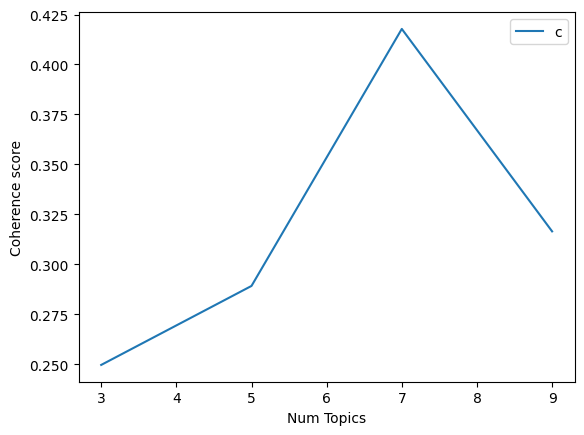

Optimal number of topics: 7


In [33]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def calculate_coherence_values(dictionary, corpus, texts, limit, start=3, step=2):
    '''
    Compute c_v coherence for various numbers of topics to find the OPTIMAL NUMBER OF TOPICS.

    Parameters:
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max number of topics
        start: Starting number of topics
        step: Increase the number by step
    '''

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Use num_topics instead of NUM_TOPICS
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)

        # Use texts instead of tokenized_doc
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

tokenized_doc = df['tokenized_review'].tolist()

# Can take a while to see the outputs.
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_doc, start=3, limit=11, step=2)

# Show graph
limit = 11
start = 3
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the optimal number of topics
optimal_num_topics = start + step * coherence_values.index(max(coherence_values))
print(f"Optimal number of topics: {optimal_num_topics}")


Topic distribution per document

In [35]:
import pandas as pd

list_in_list = []

# For the first 5 documents.
doc_topics = ldamodel.get_document_topics(corpus[:5])

# Iterate through each document
for each_doc in doc_topics:
    # Get the assigned topics and list them in terms of their highest to lowest probability.
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    # Select topic number & its probability.
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]

    # Make a list and append it to the list_in_list
    list_in_list.append([top_topic_num, top_topic_prob])

# Create a pandas DataFrame with column names
df = pd.DataFrame(list_in_list, columns=['Dominant Topic', 'Probability'])

# Display the DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


   Dominant Topic  Probability
0               3     0.631703
1               3     0.491315
2               3     0.559423
3               7     0.384367
4               3     0.474668
